In [2]:
%reload_ext autoreload
%autoreload 
%matplotlib inline

In [ ]:
Importing the necessary libraries. We are going to work with the fastai V1 library which sits on 
top of Pytorch 1.0. The fastai library provides many useful functions that enable us to quickly 
and easily build neural networks and train our models.Here is the link 
for fastai -https://github.com/fastai/fastai

In [4]:
from fastai import *
from fastai.vision import *
import os
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

In [ ]:
To get the version of fastai that is currently used

In [6]:
!pip show fastai

Name: fastai
Version: 1.0.34
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /opt/anaconda3/lib/python3.6/site-packages
Requires: fastprogress, matplotlib, numpy, pandas, bottleneck, numexpr, Pillow, requests, scipy, spacy, regex, thinc, cymem, torchvision-nightly, typing, pyyaml, dataclasses
Required-by: 


In [ ]:
Credits to University of Jaffna, Srilanka. The dataset has 125 dataclasses.
Each class has 100 images. These are not handwritten data. Here is the link to the dataset -
http://www.jfn.ac.lk/wp-content/uploads/2016/04/UJTDchar.zip. Our model will need to 
learn to differentiate between these 100 distinct categories

In [4]:
!wget http://www.jfn.ac.lk/wp-content/uploads/2016/04/UJTDchar.zip  && unzip -qq UJTDchar.zip -d data_tamil/ 


--2018-12-01 06:13:07--  http://www.jfn.ac.lk/wp-content/uploads/2016/04/UJTDchar.zip
Resolving www.jfn.ac.lk (www.jfn.ac.lk)... 192.248.56.21
Connecting to www.jfn.ac.lk (www.jfn.ac.lk)|192.248.56.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13784829 (13M) [application/zip]
Saving to: ‘UJTDchar.zip.4’

UJTDchar.zip.4      100%[===================>]  13.15M  5.71MB/s    in 2.3s    

2018-12-01 06:13:10 (5.71 MB/s) - ‘UJTDchar.zip.4’ saved [13784829/13784829]



In [7]:
pwd

'/home/jupyter/workingfiles'

In [8]:
path = Path("data_tamil/UJTDchar/")

In [9]:
path

PosixPath('data_tamil/UJTDchar')

In [7]:
path.ls()

[PosixPath('data_tamil/UJTDchar/ழீ'),
 PosixPath('data_tamil/UJTDchar/ச'),
 PosixPath('data_tamil/UJTDchar/ளீ'),
 PosixPath('data_tamil/UJTDchar/ஞ்'),
 PosixPath('data_tamil/UJTDchar/test_image'),
 PosixPath('data_tamil/UJTDchar/கூ'),
 PosixPath('data_tamil/UJTDchar/றி'),
 PosixPath('data_tamil/UJTDchar/னூ'),
 PosixPath('data_tamil/UJTDchar/ழ'),
 PosixPath('data_tamil/UJTDchar/டி'),
 PosixPath('data_tamil/UJTDchar/பூ'),
 PosixPath('data_tamil/UJTDchar/ள்'),
 PosixPath('data_tamil/UJTDchar/ழ்'),
 PosixPath('data_tamil/UJTDchar/று'),
 PosixPath('data_tamil/UJTDchar/ர'),
 PosixPath('data_tamil/UJTDchar/ச்'),
 PosixPath('data_tamil/UJTDchar/நீ'),
 PosixPath('data_tamil/UJTDchar/மூ'),
 PosixPath('data_tamil/UJTDchar/ஞூ'),
 PosixPath('data_tamil/UJTDchar/லீ'),
 PosixPath('data_tamil/UJTDchar/ஏ'),
 PosixPath('data_tamil/UJTDchar/ணி'),
 PosixPath('data_tamil/UJTDchar/ணீ'),
 PosixPath('data_tamil/UJTDchar/ள'),
 PosixPath('data_tamil/UJTDchar/லூ'),
 PosixPath('data_tamil/UJTDchar/வ'),
 PosixPath

In [ ]:
Visualising data in the dataset.

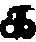

In [184]:
img = open_image('data_tamil/UJTDchar/க/Ta (1).jpg')
img


In [155]:
img.data,img.shape,img.size


(<memory at 0x7f50ea8d27c8>, (42, 36, 3), 4536)

In [ ]:
Setting Batch size to 64, transforms and creating databunch.

In [76]:
bs = 64

tfms = get_transforms(do_flip=False)

data = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms,size=32)
        .databunch())


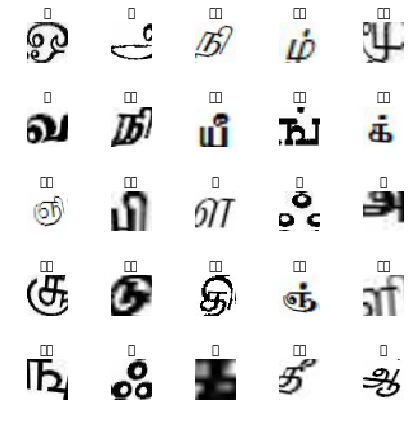

In [77]:
data.show_batch(rows=5, figsize=(6,6))


In [71]:
print(data.classes)


['test_image', 'ஃ', 'அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'க', 'கி', 'கீ', 'கு', 'கூ', 'க்', 'ங', 'ஙி', 'ஙீ', 'ஙு', 'ஙூ', 'ங்', 'ச', 'சி', 'சீ', 'சு', 'சூ', 'ச்', 'ஞ', 'ஞி', 'ஞீ', 'ஞு', 'ஞூ', 'ஞ்', 'ட', 'டி', 'டீ', 'டு', 'டூ', 'ட்', 'ண', 'ணி', 'ணீ', 'ணு', 'ணூ', 'ண்', 'த', 'தி', 'தீ', 'து', 'தூ', 'த்', 'ந', 'நி', 'நீ', 'நு', 'நூ', 'ந்', 'ன', 'னி', 'னீ', 'னு', 'னூ', 'ன்', 'ப', 'பி', 'பீ', 'பு', 'பூ', 'ப்', 'ம', 'மி', 'மீ', 'மு', 'மூ', 'ம்', 'ய', 'யி', 'யீ', 'யு', 'யூ', 'ய்', 'ர', 'ரி', 'ரீ', 'ரு', 'ரூ', 'ர்', 'ற', 'றி', 'றீ', 'று', 'றூ', 'ற்', 'ல', 'லி', 'லீ', 'லு', 'லூ', 'ல்', 'ள', 'ளி', 'ளீ', 'ளு', 'ளூ', 'ள்', 'ழ', 'ழி', 'ழீ', 'ழு', 'ழூ', 'ழ்', 'வ', 'வி', 'வீ', 'வு', 'வூ', 'வ்', 'ா', 'ெ', 'ே', 'ை']


In [72]:
len(data.classes)


125

In [ ]:
Now we will start training our model. 
We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/)

In [78]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)


In [ ]:
We will train for 10 epochs (10 cycles through all our data).The default Learning rate is 3e-3.

In [80]:
learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,error_rate
1,2.842043,2.209182,0.577187
2,2.752279,2.086592,0.575574
3,2.661642,1.871485,0.546554
4,2.466333,1.685651,0.501008
5,2.278390,1.511040,0.458686
6,2.129263,1.362926,0.417574
7,1.964028,1.258720,0.384119
8,1.856429,1.199457,0.362757
9,1.834948,1.190257,0.361145
10,1.794963,1.184543,0.360339


In [ ]:
Save the model.

In [81]:
learn.save('stage-1-tamilchar-resnet34')


In [ ]:
We will first see which were the categories that the model most confused with one another.
We will try to see if what the model predicted was reasonable or not. 
In this case the mistakes look reasonable (none of the mistakes seems obviously naive). 
This is an indicator that our classifier is working correctly.


In [189]:
interp = ClassificationInterpretation.from_learner(learn)

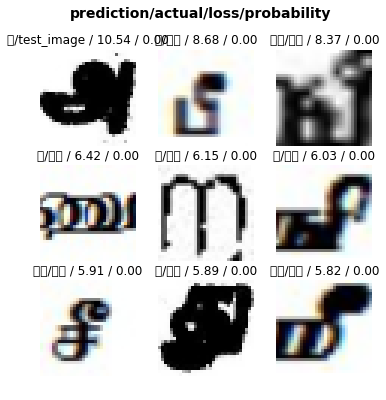

In [190]:
interp.plot_top_losses(9, figsize=(6,6))

In [194]:
interp.most_confused(min_val=2)

[('ணீ', 'ணி', 11),
 ('ணி', 'ணீ', 9),
 ('ளி', 'ளீ', 9),
 ('ணூ', 'னு', 8),
 ('ணு', 'ணூ', 7),
 ('ழு', 'ழூ', 7),
 ('ச', 'சு', 6),
 ('ஞீ', 'ஞ்', 6),
 ('டு', 'டூ', 6),
 ('தீ', 'த்', 6),
 ('னூ', 'ணூ', 6),
 ('ளீ', 'ளி', 6),
 ('வி', 'வீ', 6),
 ('ஒ', 'ஓ', 5),
 ('க்', 'த்', 5),
 ('ணூ', 'ணு', 5),
 ('நூ', 'தூ', 5),
 ('மூ', 'மு', 5),
 ('யூ', 'பூ', 5),
 ('றீ', 'ற்', 5),
 ('ளூ', 'ளு', 5),
 ('ஆ', 'அ', 4),
 ('எ', 'ன', 4),
 ('ஓ', 'ஒ', 4),
 ('க', 'சு', 4),
 ('கூ', 'சு', 4),
 ('க்', 'ச்', 4),
 ('ங', 'க', 4),
 ('ஙீ', 'ங்', 4),
 ('சு', 'க', 4),
 ('நி', 'ழி', 4),
 ('ன', 'ண', 4),
 ('னி', 'ணி', 4),
 ('னூ', 'னு', 4),
 ('ன்', 'ள்', 4),
 ('ப', 'ய', 4),
 ('ம்', 'ய்', 4),
 ('ர்', 'ா', 4),
 ('று', 'றூ', 4),
 ('ல', 'ை', 4),
 ('லீ', 'லி', 4),
 ('லூ', 'லு', 4),
 ('ளு', 'ளூ', 4),
 ('ழ', 'ழ்', 4),
 ('ழ்', 'ம', 4),
 ('அ', 'ஆ', 3),
 ('ஐ', 'ஒ', 3),
 ('கூ', 'க', 3),
 ('கூ', 'ண', 3),
 ('சி', 'கி', 3),
 ('சு', 'ச', 3),
 ('ச்', 'க்', 3),
 ('ஞீ', 'ஞி', 3),
 ('ண', 'ன', 3),
 ('ண', 'ை', 3),
 ('ணு', 'னு', 3),
 ('து', 'சூ', 3),
 ('தூ'

In [107]:
learn.load('stage-1-tamilchar-resnet34')


Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (9926 items)
[Category ழீ, Category ழீ, Category ழீ, Category ழீ, Category ழீ]...
Path: data_tamil/UJTDchar
x: ImageItemList (9926 items)
[Image (3, 20, 17), Image (3, 17, 20), Image (3, 16, 13), Image (3, 27, 24), Image (3, 20, 18)]...
Path: data_tamil/UJTDchar;

Valid: LabelList
y: CategoryList (2481 items)
[Category த, Category க், Category ண், Category தூ, Category ணூ]...
Path: data_tamil/UJTDchar
x: ImageItemList (2481 items)
[Image (3, 37, 31), Image (3, 23, 21), Image (3, 21, 29), Image (3, 13, 21), Image (3, 12, 34)]...
Path: data_tamil/UJTDchar;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(


In [ ]:
Finding the learning rate using lr_find.


In [109]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


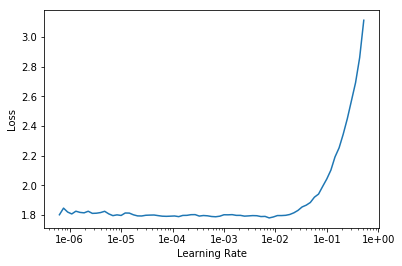

In [110]:
learn.recorder.plot()

In [ ]:
Using the learn.recorder.plot() we can see that the losses are minimum  between 1e-6 and 1e-3. 
Hence we train with LR - 1e-6 and 1e-3 for 8 epochs.

In [111]:
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-3))


epoch,train_loss,valid_loss,error_rate
1,1.766188,1.178411,0.355502
2,1.771488,1.156372,0.363563
3,1.792062,1.129696,0.359532
4,1.764947,1.126311,0.345828
5,1.739112,1.113814,0.355502
6,1.702457,1.106097,0.340992
7,1.660205,1.086213,0.335752
8,1.659960,1.085959,0.340185


In [112]:
learn.save('stage1-resnet34-lr-tuning')

In [ ]:
Let us load the stage-1-tamilchar-resnet34 model. Unfreeze all layers and train.

In [113]:
learn.load('stage-1-tamilchar-resnet34')


Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (9926 items)
[Category ழீ, Category ழீ, Category ழீ, Category ழீ, Category ழீ]...
Path: data_tamil/UJTDchar
x: ImageItemList (9926 items)
[Image (3, 20, 17), Image (3, 17, 20), Image (3, 16, 13), Image (3, 27, 24), Image (3, 20, 18)]...
Path: data_tamil/UJTDchar;

Valid: LabelList
y: CategoryList (2481 items)
[Category த, Category க், Category ண், Category தூ, Category ணூ]...
Path: data_tamil/UJTDchar
x: ImageItemList (2481 items)
[Image (3, 37, 31), Image (3, 23, 21), Image (3, 21, 29), Image (3, 13, 21), Image (3, 12, 34)]...
Path: data_tamil/UJTDchar;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(


In [114]:
learn.unfreeze()

In [115]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


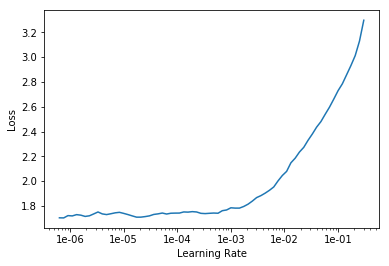

In [116]:
learn.recorder.plot()


In [117]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-5))


epoch,train_loss,valid_loss,error_rate
1,1.749000,1.161759,0.355905
2,1.731900,1.117640,0.345425
3,1.691640,1.105603,0.342604
4,1.680051,1.095787,0.332527


In [118]:
learn.save('stage2-resnet-all-layers')

In [ ]:
We can see that the error_rate has decreased from 0.360339 in stage-1-tamilchar-resnet34 model to 0.332527 when 
we trained all the layers. This model is saved as stage2-resnet-all-layers.

In [119]:
learn.load('stage2-resnet-all-layers')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (9926 items)
[Category ழீ, Category ழீ, Category ழீ, Category ழீ, Category ழீ]...
Path: data_tamil/UJTDchar
x: ImageItemList (9926 items)
[Image (3, 20, 17), Image (3, 17, 20), Image (3, 16, 13), Image (3, 27, 24), Image (3, 20, 18)]...
Path: data_tamil/UJTDchar;

Valid: LabelList
y: CategoryList (2481 items)
[Category த, Category க், Category ண், Category தூ, Category ணூ]...
Path: data_tamil/UJTDchar
x: ImageItemList (2481 items)
[Image (3, 37, 31), Image (3, 23, 21), Image (3, 21, 29), Image (3, 13, 21), Image (3, 12, 34)]...
Path: data_tamil/UJTDchar;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(


In [ ]:
1.Testing the model with custom images. 
'img_fromds.jpg' is an image from the dataset. We can see that our model 
has predicted it right. 

In [120]:
filename = 'data_tamil/UJTDchar/test_image/img_fromds.jpg'


In [ ]:
Prediction by the model.

In [121]:
img = open_image(filename)
losses = learn.predict(img)
prediction = losses[0];
prediction

Category அ

In [ ]:
Original image.

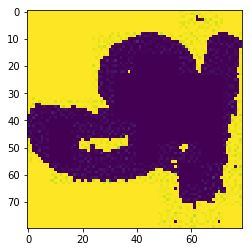

In [122]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
2.Testing the model with custom images. 
'tamil_1.png' is an image from Google. We can see that our model 
has predicted it right. 

In [123]:
filename = 'data_tamil/UJTDchar/test_image/tamil_1.png'


In [ ]:
Prediction by the model.

In [124]:
img = open_image(filename)
losses = learn.predict(img)
prediction = losses[0];
prediction

Category இ

In [ ]:
Original image.

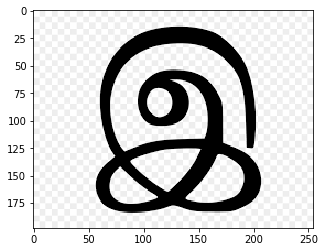

In [125]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
3.Testing the model with custom images. 
'img4.png' is an image from Google. We can see that our model 
has not predicted it right. 

In [141]:
filename = 'data_tamil/UJTDchar/test_image/img4.png'

In [ ]:
Prediction by the model.

In [142]:
img = open_image(filename)
losses = learn.predict(img)
prediction = losses[0];
prediction

Category ஊ

In [ ]:
Original image.

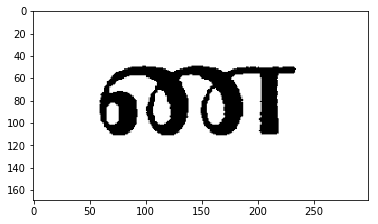

In [143]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()